<div>
<img src='../pics/banner.PNG'/>
</div>
<div>
<img width="15%" src='../pics/tinlab.png'/>
<strong>Correlation - Jeroen Boogaard</strong>
</div>

<h1>Simple Linear Regression</h1>
<p>
Line of best fit
The aim is to minimize prediction errors by finding a regression line that best fit the data.
This is done in a supervised way by minimizing the (absolute) distance between the observed (labeled) values and the
values predicted by the model.</p>
<img width="20%" src='../pics/regression_line.png'/>

**Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [34]:
%matplotlib inline

**Load Dataset**

In [3]:
df = pd.read_csv("../csv/forza_2023-05-19.csv", sep=';', header=0)
df

,s_speed_x,s_speed_y,s_speed_z,s_rpm,s_gear,s_angle,s_z,s_damage,s_track_position,s_race_position,s_distance_raced,s_distance_from_start,s_current_laptime,s_last_laptime,a_accelation,a_brake,a_gear,a_steer,a_clutch
0,-0.005887,-0.027970,0.000171,942,0,0.000210,0.345256,0.0,-0.333363,1,0.000000,5759.100098,-0.982000,0.000000,1.000000,0.0,1,0.455342,0.0
1,-0.005887,-0.027970,0.000171,1100,0,0.000210,0.345256,0.0,-0.333363,1,0.000000,5759.100098,-0.962000,0.000000,1.000000,0.0,1,0.455342,0.0
2,-0.005887,-0.027970,0.000171,1263,0,0.000210,0.345256,0.0,-0.333363,1,0.000000,5759.100098,-0.942000,0.000000,1.000000,0.0,1,0.455342,0.0
3,-0.005887,-0.027970,0.000171,1432,0,0.000210,0.345256,0.0,-0.333363,1,0.000000,5759.100098,-0.922000,0.000000,1.000000,0.0,1,0.455342,0.0
4,-0.005887,-0.027970,0.000171,1605,0,0.000210,0.345256,0.0,-0.333363,1,0.000000,5759.100098,-0.902000,0.000000,1.000000,0.0,1,0.455342,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27100,149.367004,0.217909,0.014252,6292,4,-0.002065,0.333751,0.0,0.365540,1,17373.199219,5780.000000,182.518005,182.686005,0.306337,0.0,4,-0.007270,0.0
27101,149.367004,0.218345,0.011003,6293,4,-0.003257,0.333752,0.0,0.366278,1,17374.099609,5780.910156,182.539993,182.686005,0.306337,0.0,4,-0.007331,0.0
27102,149.367004,0.218885,0.007687,6292,4,-0.004707,0.333747,0.0,0.367154,1,17375.099609,5781.810059,182.561996,182.686005,0.306337,0.0,4,-0.007406,0.0
27103,149.367004,0.219488,0.005873,6292,4,-0.006692,0.333760,0.0,0.368392,1,17376.000000,5782.720215,182.584000,182.686005,0.306337,0.0,4,-0.007508,0.0


In [36]:
np.mean(df[['s_speed_x']])

113.23829425069175

In [39]:
df[['a_steer']].var

<bound method DataFrame.var of         a_steer
0      0.455342
1      0.455342
2      0.455342
3      0.455342
4      0.455342
...         ...
27100 -0.007270
27101 -0.007331
27102 -0.007406
27103 -0.007508
27104 -0.007615

[27105 rows x 1 columns]>

**Feature Selection**

In [33]:
# dataset = df[['s_speed_x', 's_speed_y', 's_angle', 'a_brake', 'a_gear', 'a_steer']]
dataset = df[['s_angle', 'a_steer']]
X = dataset.iloc[ : ,   : 1 ].values
Y = dataset.iloc[ : , 1 ].values
dataset.size

54210

**Split dataset**

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/4, random_state = 0) 

**Fitting Simple Linear Regression Model to the training set**

In [25]:
linregressor = LinearRegression()
linregressor = linregressor.fit(X_train, Y_train)

**Predecting the Result**

In [26]:
Y_pred = linregressor.predict(X_test)
Y_pred

array([-0.08520804, -0.00312309, -0.23107897, ...,  0.04273069,
        0.04261257, -0.13615967])

**Visualization**

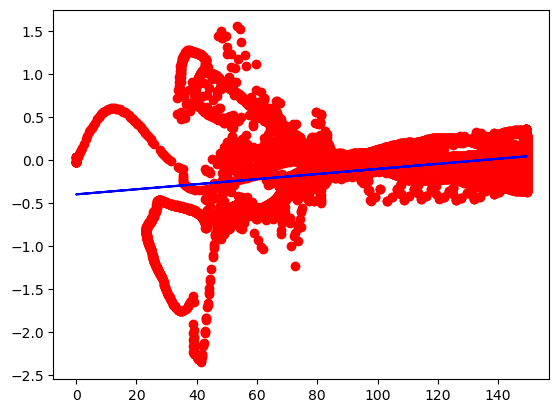

In [27]:
plt.scatter(X_train , Y_train, color = 'red')
plt.plot(X_train , linregressor.predict(X_train), color ='blue')

**Exercise**
Use the same steps to train and test the [MLP Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)

In [28]:
mlpregressor = MLPRegressor(random_state=1, max_iter=500).fit(X_train, Y_train)
mlpregressor = regressor.fit(X_train, Y_train)

In [29]:
Y_pred = mlpregressor.predict(X_test)
Y_pred

array([-0.08520804, -0.00312309, -0.23107897, ...,  0.04273069,
        0.04261257, -0.13615967])

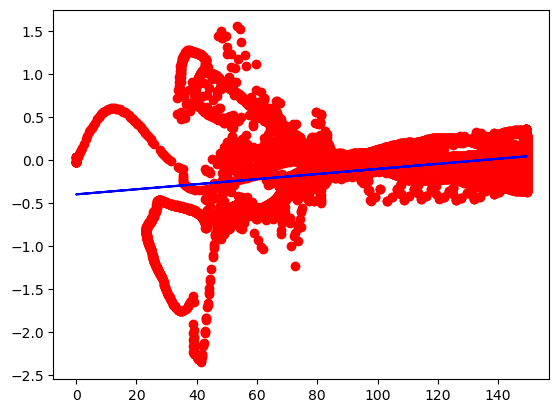

In [30]:
plt.scatter(X_train , Y_train, color = 'red')
plt.plot(X_train , regressor.predict(X_train), color ='blue')

### Reference
[100-Days-Of-ML-Code](https://github.com/AlxcNL/100-Days-Of-ML-Code/blob/master/Code/Day2_Simple_Linear_Regression.md)